In [226]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [227]:
df = pd.read_csv("Data/attacks.csv",encoding='latin')
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [417]:
df_sharks=df[["Country", "Area", "Year", "Activity", "Age", "Fatal (Y/N)"]]
df_sharks.isnull()
df_sharks=df_sharks.dropna(subset=["Country", "Area", "Year", "Activity", "Age", "Fatal (Y/N)"])
df_sharks = df_sharks.set_index(["Country", "Area"])
df_sharks=df_sharks[df_sharks.index.isin(["AUSTRALIA", "USA", "SOUTH AFRICA", "SPAIN", "PERU", "MEXICO"
                                   , "INDONESIA", "COSTA RICA", "BRAZIL", "IRELAND"], level=0)]
df_sharks=df_sharks.reset_index()
df_sharks=df_sharks.sort_values(['Country', 'Area', 'Year', 'Age'], ascending=True)
df_sharks

,Country,Area,Year,Activity,Age,Fatal (Y/N)
2455,AUSTRALIA,New South Wales,1837.0,Washing his feet,12,Y
2447,AUSTRALIA,New South Wales,1863.0,Bathing,17,Y
2442,AUSTRALIA,New South Wales,1877.0,Bathing,11,N
2441,AUSTRALIA,New South Wales,1878.0,Bathing in 2 feet of water,11,Y
2438,AUSTRALIA,New South Wales,1880.0,Bathing,13,N
...,...,...,...,...,...,...
1624,USA,Virginia,1983.0,Swimming,14,N
1449,USA,Virginia,1991.0,Boogie boarding,13,N
1072,USA,Virginia,2001.0,Swimming,10,Y
740,USA,Virginia,2007.0,Reviving a sedated shark,40,N


In [418]:
df_sharks["Country"].unique()

array(['AUSTRALIA', 'BRAZIL', 'COSTA RICA', 'INDONESIA', 'MEXICO',
       'SOUTH AFRICA', 'SPAIN', 'USA'], dtype=object)

In [419]:
df_sharks['Area'].unique()

array(['New South Wales', 'Northern Territory', 'Queensland',
       'Queensland ', 'South Australia', 'Tasmania',
       'Territory of Cocos (Keeling) Islands', 'Torres Strait',
       'Torres Strait ', 'Victoria', 'Victoria ', 'Westerm Australia',
       'Western Australia', 'Alagoas', 'Bahia', 'Balneário Camboriú',
       'Boi Island, Victoria', 'Fernando de Noronha', 'Pernambuco',
       'Rio Grande Do Sul', 'Rio Grande de Norte', 'Rio de Janeiro',
       'Santa Catarina State', 'Cocos Island', 'Guanacaste', 'Bali',
       'East Java', 'Jakarta Harbour', 'Baja California',
       'Baja California Sur', 'Cabo San Lucas', 'Colima', 'Guerrero',
       'Guerro', 'Quintana Roo', 'Sinaloa', 'Tabasco', 'Veracruz',
       'Eastern Cape  Province', 'Eastern Cape Province', 'KwaZulu-Natal',
       'KwaZulu-Natal between Port Edward and Port St Johns',
       'Western Cape Province', 'Western Province', 'Alicante',
       'Alicante Province', 'Canary Islands', 'Catalonia', 'Costa Blanca',
   

In [420]:
df_sharks = df_sharks[df_sharks['Year'] > 0]
df_sharks['Year'].unique()

array([1837., 1863., 1877., 1878., 1880., 1883., 1888., 1892., 1894.,
       1895., 1896., 1902., 1905., 1906., 1912., 1915., 1916., 1919.,
       1920., 1922., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1932., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1944., 1946., 1947., 1948., 1949., 1951., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1966., 1967., 1968., 1969., 1971., 1972., 1975., 1977.,
       1979., 1981., 1982., 1987., 1988., 1989., 1991., 1992., 1993.,
       1996., 1997., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 1950., 1870., 1886., 1901., 1907.,
       1911., 1913., 1918., 1921., 1931., 1933., 1943., 1965., 1973.,
       1974., 1983., 1984., 1990., 1994., 1995., 1855., 1952., 1976.,
       1985., 1998., 1978., 1856., 1858., 1914., 1986., 1923., 1980.,
       1970., 1887.,

In [421]:
df_sharks.loc[:, 'Age']=[np.nan if not str(i).isdigit() else int(i) for i in df_sharks['Age'].dropna()]
#re.split('[a-z]+', 'AGE', flags=re.IGNORECASE)
df_sharks['Age'].unique()

array([12, 17, 11, 13, 21, 37, 19, 14, 40, nan, 18, 41, 47, 26, 16, 20,
       30, 10, 15, 28, 39, 49, 24, 22, 27, 32, 23, 55, 34, 9, 36, 25, 29,
       35, 31, 45, 7, 59, 42, 52, 51, 33, 46, 48, 63, 44, 50, 38, 43, 62,
       71, 65, 73, 8, 54, 56, 69, 84, 60, 57, 61, 78, 58, 64, 74, 66, 77,
       82, 53, 75, 6, 5, 70, 68, 86, 3, 87], dtype=object)

In [422]:
#df_sharks=df_sharks.loc[df_sharks['Activity'].str.contains('Surfing', case=False)]
df_sharks=df_sharks[df_sharks['Activity'] == 'Surfing']
df_sharks

,Country,Area,Year,Activity,Age,Fatal (Y/N)
2371,AUSTRALIA,New South Wales,1922.0,Surfing,26,Y
2235,AUSTRALIA,New South Wales,1944.0,Surfing,14,N
2208,AUSTRALIA,New South Wales,1947.0,Surfing,17,N
2094,AUSTRALIA,New South Wales,1957.0,Surfing,15,N
2038,AUSTRALIA,New South Wales,1960.0,Surfing,17,N
...,...,...,...,...,...,...
1347,USA,Texas,1995.0,Surfing,34,N
1157,USA,Texas,2000.0,Surfing,17,N
877,USA,Texas,2005.0,Surfing,37,N
552,USA,Texas,2010.0,Surfing,20,N


In [423]:
df_sharks.loc[:,'Fatal (Y/N)'].replace([' N'], 'N', inplace=True)
filter_y_n= ['Y', 'N']
cleaning_y_n=df_sharks['Fatal (Y/N)'].isin(filter_y_n)
df_sharks=df_sharks.loc[cleaning_y_n]
df_sharks['Fatal (Y/N)'].value_counts()
df_sharks

,Country,Area,Year,Activity,Age,Fatal (Y/N)
2371,AUSTRALIA,New South Wales,1922.0,Surfing,26,Y
2235,AUSTRALIA,New South Wales,1944.0,Surfing,14,N
2208,AUSTRALIA,New South Wales,1947.0,Surfing,17,N
2094,AUSTRALIA,New South Wales,1957.0,Surfing,15,N
2038,AUSTRALIA,New South Wales,1960.0,Surfing,17,N
...,...,...,...,...,...,...
1347,USA,Texas,1995.0,Surfing,34,N
1157,USA,Texas,2000.0,Surfing,17,N
877,USA,Texas,2005.0,Surfing,37,N
552,USA,Texas,2010.0,Surfing,20,N


#sns.countplot(data=df_sharks, x="")
barplot = sns.barplot(x="Year", y="Activity", data=df_sharks, error=None)

In [434]:
df_sharks_young=df_sharks[(df_sharks['Age'] <18)]
df_sharks_young=df_sharks_young.sort_values(['Country', 'Area', 'Age'], ascending=True)
df_sharks_adult=df_sharks[(df_sharks['Age'] >=18) & (df_sharks['Age'] <=60)]
df_sharks_adult=df_sharks_adult.sort_values(['Country', 'Area', 'Age'], ascending=True)
df_sharks_old=df_sharks[(df_sharks['Age'] >60)]
df_sharks_old=df_sharks_old.sort_values(['Country', 'Area', 'Age'], ascending=True)

In [435]:
df_sharks_young

,Country,Area,Year,Activity,Age,Fatal (Y/N)
1541,AUSTRALIA,New South Wales,1988.0,Surfing,12,N
264,AUSTRALIA,New South Wales,2014.0,Surfing,13,N
2235,AUSTRALIA,New South Wales,1944.0,Surfing,14,N
691,AUSTRALIA,New South Wales,2008.0,Surfing,14,N
594,AUSTRALIA,New South Wales,2009.0,Surfing,14,N
...,...,...,...,...,...,...
352,USA,South Carolina,2013.0,Surfing,10,N
1020,USA,South Carolina,2002.0,Surfing,13,N
202,USA,South Carolina,2015.0,Surfing,15,N
1489,USA,Texas,1989.0,Surfing,12,N


In [436]:
df_sharks_adult

,Country,Area,Year,Activity,Age,Fatal (Y/N)
1952,AUSTRALIA,New South Wales,1963.0,Surfing,18,N
124,AUSTRALIA,New South Wales,2016.0,Surfing,18,N
1990,AUSTRALIA,New South Wales,1962.0,Surfing,19,N
1821,AUSTRALIA,New South Wales,1972.0,Surfing,19,N
1760,AUSTRALIA,New South Wales,1975.0,Surfing,20,N
...,...,...,...,...,...,...
71,USA,South Carolina,2017.0,Surfing,33,N
552,USA,Texas,2010.0,Surfing,20,N
1347,USA,Texas,1995.0,Surfing,34,N
877,USA,Texas,2005.0,Surfing,37,N


In [437]:
df_sharks_old

,Country,Area,Year,Activity,Age,Fatal (Y/N)
464,AUSTRALIA,New South Wales,2011.0,Surfing,63,N
95,AUSTRALIA,New South Wales,2016.0,Surfing,65,N
859,USA,Florida,2005.0,Surfing,61,N
448,USA,Florida,2012.0,Surfing,61,N
561,USA,Hawaii,2010.0,Surfing,68,N


<Axes: xlabel='Country', ylabel='count'>

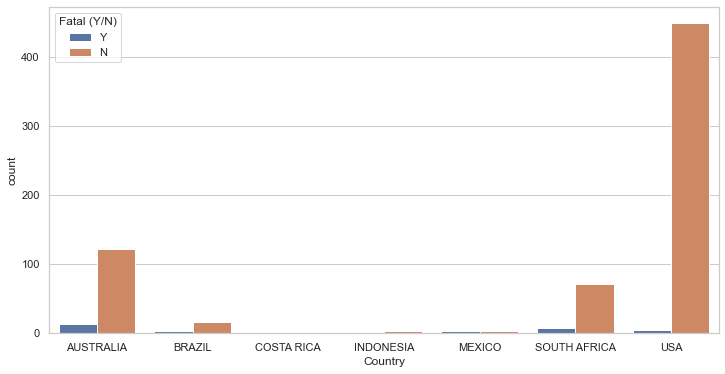

In [439]:
sns.countplot(x=df_sharks["Country"], hue=df_sharks["Fatal (Y/N)"])

###Sample codes below

df_sharks['Age'].unique()
#df_sharks['Age']=df_sharks['Age'].replace.astype(int)



class Age():
    def _init_(self, age):
        self.age = age
    def format_age(self):
        if isinstance(self.age, str):
            return self.age.strip()
        elif isinstance(self.age, (int, float)):
            return str(int(self.age))
        else:
        
--------


class Age():
    def _init_(self, age):
        self_age = age
        for i in self_age:
            if type(i) != type(int):
                return df_sharks['Age'].strip(i)
            else:
                pass
                
--------------------
#df_sharks['Activity_2'] = df_sharks['Activity'].str.extract(r'\b(surf)') 
#df_sharks['Activity'].unique()
df_sharks['Activity'] = df_sharks['Activity'].astype(str)
surf_regex = re.compile(r'\bsurf\w*')
Activity_surf = []
for i in df_sharks['Activity']:
    if surf_regex.search(i):
        Activity_surf.append(i)

df_sharks['Fatal (Y/N)'].value_counts()

df_sharks['Fatal (Y/N)'].replace([' N'], 'N', inplace=True)
filter_y_n= ['Y', 'N']
cleaning_y_n=df_sharks['Fatal (Y/N)'].isin(filter_y_n)
df_sharks=df_sharks.loc[cleaning_y_n]
df_sharks['Fatal (Y/N)'].value_counts()

df_sharks=df_sharks.sort_values('Country', ascending=True)
filter_y_n= ['Y', 'N']
cleaning_y_n=df_sharks['Fatal (Y/N)'].isin(filter_y_n)
df_sharks=df_sharks.loc[cleaning_y_n]
----
df_sharks['Fatal (Y/N)'].replace([' N'], 'N', inplace=True)
filter_y_n= ['Y', 'N']
cleaning_y_n=df_sharks['Fatal (Y/N)'].isin(filter_y_n)
df_sharks=df_sharks.loc[cleaning_y_n]
df_sharks['Fatal (Y/N)'].value_counts()
----

df_sharks['Fatal (Y/N)']=[i.lower().replace(" N", "N") for i in df_sharks['Fatal (Y/N)'] inplace=True]

df_sharks['Age']=[np.nan if not str(i).isdigit() else int(i) for i in df_sharks['Age'].dropna()]
df_sharks['Age'].unique()

df_sharks = df_sharks.set_index(["Country", "Area"])
---------------
.sort_values(['Country', 'Area'], ascending=True)

df_sharks=df_sharks[df_sharks.index.isin(["AUSTRALIA", "USA", "SOUTH AFRICA", "SPAIN", "PERU", "MEXICO"
                                   , "INDONESIA", "COSTA RICA", "BRAZIL", "IRELAND"], level=0)]
df_sharks.sort_values(ascending=True)
df_sharks.sort_index(ascending=True)

df_sharks = df_sharks.set_index(["Country", "Area"])
df_sharks
-----------
df_sharks["Country"].unique()
--------------------
vzla  = df_sharks.Country == "VENEZUELA"
sa = df_sharks.Country == "SOUTH AFRICA"
spn = df_sharks.Country == "SPAIN"
peru = df_sharks.Country == "PERU"
mex = df_sharks.Country == "MEXICO"
ind = df_sharks.Country == "INDONESIA"
cr = df_sharks.Country == "COSTA RICA"
brz = df_sharks.Country == "BRAZIL"
ire = df_sharks.Country == "IRELAND"
df_sharks = [usa|aust|vzla|sa|spn|peru|mex|ind|cr|brz|ire]

df_sharks.Country.unique()

df_sharks = (df_sharks.sort(by = ["Country", "Area"], ascending=False))
df_2 = df_2.set_index(["Country", "Area"])
df_2 = (df_2.sort(by = ["Country", "Area", "Year"], ascending=False))
df_2.head()
-----------
df_sharks = df_2.set_index("Country")
-----------
df_2 = (df_2.sort_values(by = ["Country", "Area", "Year"], ascending=True))
df_2.head()

pd.isna(df).sum()